In [49]:
import uproot
import pandas as pd
import numpy as np
import json
from scipy.optimize import curve_fit, minimize
from scipy.stats import argus
from scipy.integrate import quad
from numpy import  log, sqrt, exp, pi, e
import multiprocessing
import os
from numba import njit
from source import *
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL

In [2]:
def errorhist(data, bins=10, fmt='.', color='dimgrey', err_func = np.sqrt, axs = plt):
        counts, bin_edges = np.histogram(data, bins=bins)
        bin_centers = bin_edges[:-1] + (bin_edges[1] - bin_edges[0]) / 2
        axs.errorbar(bin_centers, counts, yerr=err_func(counts), fmt=fmt, color=color)
        return counts, bin_centers

/home/mar/Documents/data_ref/source.py:147: OptimizeWarning: Unknown solver options: xatol, fatol
  rez = minimize(df, args0, args=(bin_centers, counts), method = method, options={'xatol': h, 'fatol': h}, bounds=bounds)


 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 3.7684042562273654
       x: [ 7.948e+00  9.223e-01  1.111e+00  2.043e+00  3.043e-01]
     nit: 15
     jac: [ 4.312e-05  1.020e-04  1.714e-04 -2.356e-04 -6.184e-05]
    nfev: 92
    njev: 15


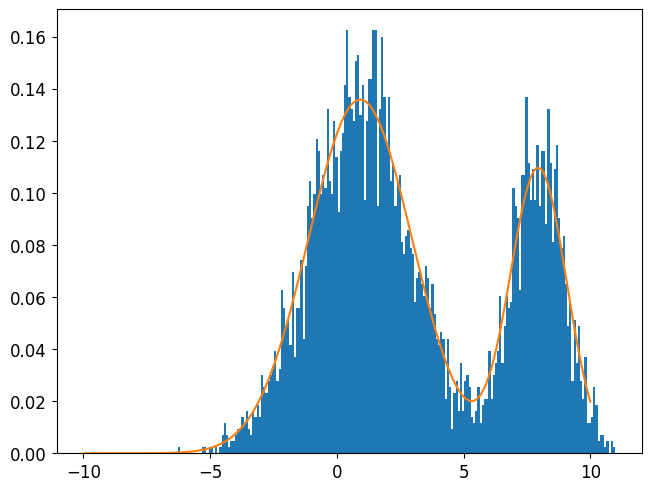

In [3]:
N = 5000
tau = 0.3
x = np.concatenate((np.random.normal(8, 1, int(N*tau)), np.random.normal(1, 2, int(N*(1-tau)))))
plt.hist(x, density=True, bins=200)
counts, bin_edges = np.histogram(x, bins=15)
bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
f = lambda x, mu1, mu2, s1, s2, tau: gaussian(x, mu1, s1)*tau + gaussian(x, mu2, s2)*(1-tau)
args, _ = max_bin_lik(f, bin_centers, counts, (8, 2, 1, 1, 0.5))
xx = np.linspace(-10, 10, 1000)
plt.plot(xx, f(xx, *args))

In [4]:
fname = "data.root"
tupl2 = uproot.open(fname)['h1']
tkeys = tupl2.keys()
print(tkeys)
re = tupl2.arrays(library='pd')

FileNotFoundError: [Errno 2] No such file or directory: '/home/mar/Documents/data_ref/data.root'

In [4]:
dataframes = []
for filename in os.listdir("inc_dat"):
    if filename.endswith('.root'):
        filepath = os.path.join("inc_dat", filename)
        with uproot.open(filepath) as file:
            tupl2 = file['h1']
            tkeys = tupl2.keys()
            print(f"Keys in {filename}: {tkeys}")
            inc = tupl2.arrays(library='pd')
            inc['source_file'] = filename
            dataframes.append(inc)

inc = pd.concat(dataframes, ignore_index=True)

Keys in 0.root: ['ecm', 'rm2l', 'dsm', 'dm', 'dsp', 'dp', 'ntr', 'chxc']
Keys in 1.root: ['ecm', 'rm2l', 'dsm', 'dm', 'dsp', 'dp', 'ntr', 'chxc']
Keys in 2.root: ['ecm', 'rm2l', 'dsm', 'dm', 'dsp', 'dp', 'ntr', 'chxc']
Keys in 3.root: ['ecm', 'rm2l', 'dsm', 'dm', 'dsp', 'dp', 'ntr', 'chxc']
Keys in 4.root: ['ecm', 'rm2l', 'dsm', 'dm', 'dsp', 'dp', 'ntr', 'chxc']
Keys in 5.root: ['ecm', 'rm2l', 'dsm', 'dm', 'dsp', 'dp', 'ntr', 'chxc']
Keys in 6.root: ['ecm', 'rm2l', 'dsm', 'dm', 'dsp', 'dp', 'ntr', 'chxc']
Keys in 7.root: ['ecm', 'rm2l', 'dsm', 'dm', 'dsp', 'dp', 'ntr', 'chxc']
Keys in 8.root: ['ecm', 'rm2l', 'dsm', 'dm', 'dsp', 'dp', 'ntr', 'chxc']
Keys in 9.root: ['ecm', 'rm2l', 'dsm', 'dm', 'dsp', 'dp', 'ntr', 'chxc']


In [5]:
path = "res//"

In [6]:
fname = "mc.root"
tupl2 = uproot.open(fname)['h1']
tkeys = tupl2.keys()
print(tkeys)
mc = tupl2.arrays(library='pd')

FileNotFoundError: [Errno 2] No such file or directory: '/home/mar/Documents/data_ref/mc.root'

In [11]:
decay_mod_taging = ["$X_c \\to D^0 p$", "$X_c \\to D^+ p \\pi^- $", "$X_c \\to D^{*0} p$", "$X_c \\to D^{*+} p \\pi^-$", "$X_c \\to \\Lambda_c^- \\pi^- \\pi^+$"]
decay_mod_tag = {"\\Lambda \\nu_l l": [lambda x: x <= 2, "L_nu_l"], "\\Lambda \\pi" : [lambda x: x == 3, "L_pi"], "p K \\pi" : [lambda x: x == 5, "p_k_pi"]}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([ 1675.,  1659.,  1996.,  1927.,  2062.,  2233.,  2398.,  2523.,
         2761.,  2919.,  3029.,  3257.,  3555.,  3784.,  3989.,  4302.,
         4635.,  4773.,  5190.,  5512.,  6005.,  6387.,  6944.,  7286.,
         8018.,  8248.,  8895.,  9303., 10047., 10920., 11675., 12526.,
        13412., 14414., 15678., 16753., 17490., 18878., 20077., 21376.,
        22893., 24185., 25802., 27307.]),
 array([1.48648775, 1.52088575, 1.55528375, 1.58968175, 1.62407975,
        1.65847775, 1.69287575, 1.72727375, 1.76167175, 1.79606975,
        1.83046775, 1.86486575, 1.89926375, 1.93366175, 1.96805975,
        2.00245775, 2.03685575, 2.07125375, 2.10565175, 2.14004975,
        2.17444775, 2.20884575, 2.24324375, 2.27764175, 2.31203975,
        2.34643775, 2.38083576, 2.41523376, 2.44963176, 2.48402976,
        2.51842776, 2.55282576, 2.58722376, 2.62162176, 2.65601976,
        2.69041776, 2.72481576, 2.75921376, 2.79361176, 2.82800976,
        2.86240776, 2.89680576, 2.93120376, 2.96560176

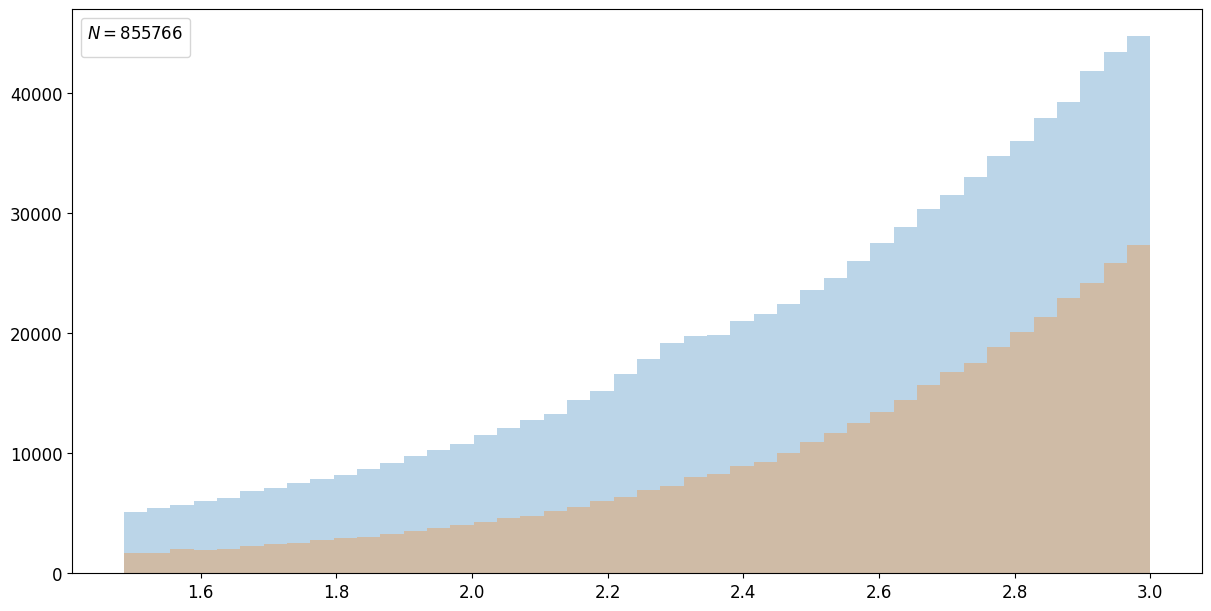

In [12]:
plt.figure(figsize=(12, 6))
dat = inc[(np.abs(inc.rm2l - Lamc_m) < 0.8) & (inc.ntr <= 3) & (inc.chxc >= 3)]
datt = inc[(np.abs(inc.rm2l - Lamc_m) < 0.8) & (inc.ntr > 3) & (inc.chxc >= 3)]
diw = np.linspace(min(dat["rm2l"]), max(dat["rm2l"]), 45)
N = dat.shape[0]
plt.legend(title = f"$N = {N}$")
plt.hist(dat["rm2l"], bins=diw, alpha=0.3)
plt.hist(datt["rm2l"], bins=diw, alpha=0.3)

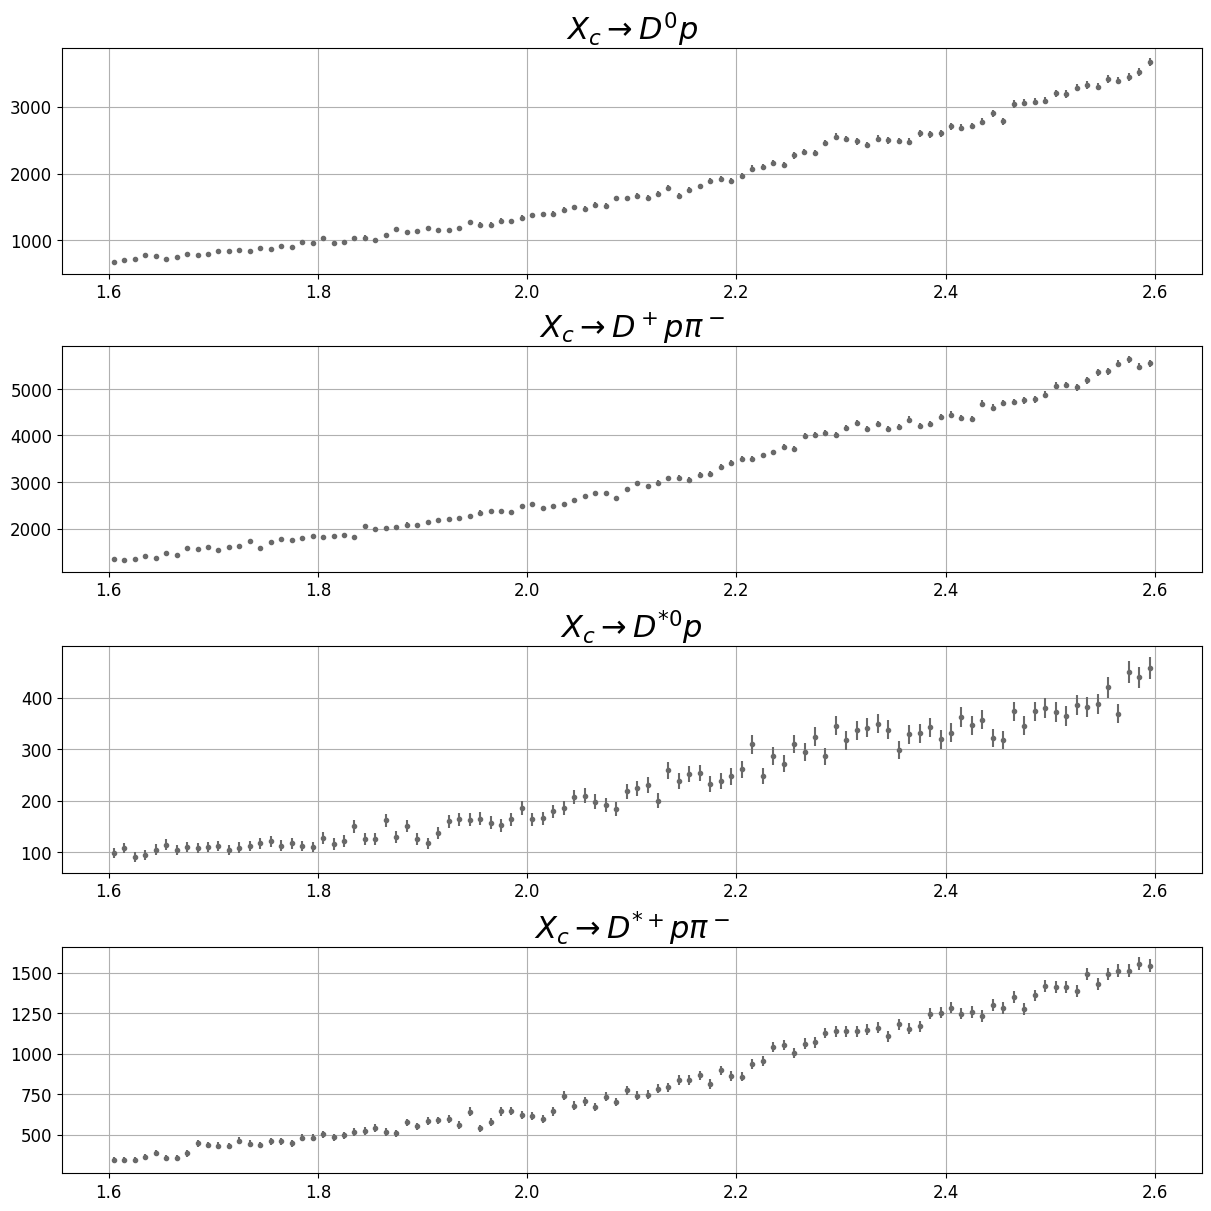

In [13]:
wbin = 0.01
a = 1.6
b = 2.6

fig, axs = plt.subplots(4, figsize=(12, 12))
for ind, i in enumerate([1, 2, 3, 4]):
    dat = inc[(inc.rm2l < b) & (inc.rm2l > a) & (inc.chxc == i) & (inc.ntr <= 3) & (
              ((inc.chxc >= 3) & (np.abs(inc.dsm - inc.dm - Ds_D_dif) < 0.003)) | 
              ((inc.chxc <= 2) & (np.abs(inc.dm - D_0_m) < 0.015)))]
    N = dat.shape[0]
    counts, bin_centers = errorhist(dat.rm2l, bins=int((b-a)/wbin), axs = axs[ind])
    axs[ind].set_title(decay_mod_taging[ind])    
    axs[ind].grid()

plt.savefig(f"{path}inc.png")
plt.show()

In [31]:
a = 1.6
b = 2.6

continuum_lam = njit(lambda x, A1, lam, mu, sig1, c0, c1, c2, c3, c4: A1*exp_dis(x - mu, lam, a - mu, b - mu) + (1-A1)*gaussian(x, 2.65, sig1) + c0*eval_chebyt(0, x - Lamc_m, a - Lamc_m, b - Lamc_m) + c1*eval_chebyt(1, x - Lamc_m, a - Lamc_m, b - Lamc_m) + c2*eval_chebyt(2, x - Lamc_m, a - Lamc_m, b - Lamc_m) + c3*eval_chebyt(3, x - Lamc_m, a - Lamc_m, b - Lamc_m) + c4*eval_chebyt(4, x - Lamc_m, a - Lamc_m, b - Lamc_m)) 
f_lam = lambda x, A, A1, lam, mu, sig, sig1, c0, c1, c2, c3, c4: A*gaussian(x, Lamc_m, sig) + (1-A)*continuum_lam(x, A1, lam, mu, sig1, c0, c1, c2, c3, c4)

In [51]:
def nll(A, A1, lam, mu, sig, sig1, c0, c1, c2, c3, c4):
    model = f_lam(bin_centers, A, A1, lam, mu, sig, sig1, c0, c1, c2, c3, c4)
    return -np.sum(counts * np.log(model) - model)

<ValueView A=0.006097199510235631 A1=0.9999999999981297 lam=1.537835293332401 mu=0.9958198346436864 sig=0.028942792531536542 sig1=0.1820535355484054 c0=0.009999999999999705 c1=0.0009999999987824952 c2=0.000999999999953832 c3=0.0009999999997941337 c4=0.0009999999999949754>
<ValueView A=0.009095380825347646 A1=0.9999999999989833 lam=1.5469560014820385 mu=1.0006369867114409 sig=0.03580075813118648 sig1=0.1763492673931069 c0=0.00999999999993452 c1=0.000999999998344863 c2=0.0009999999999337349 c3=0.0009999999985898064 c4=0.0009999999997794794>


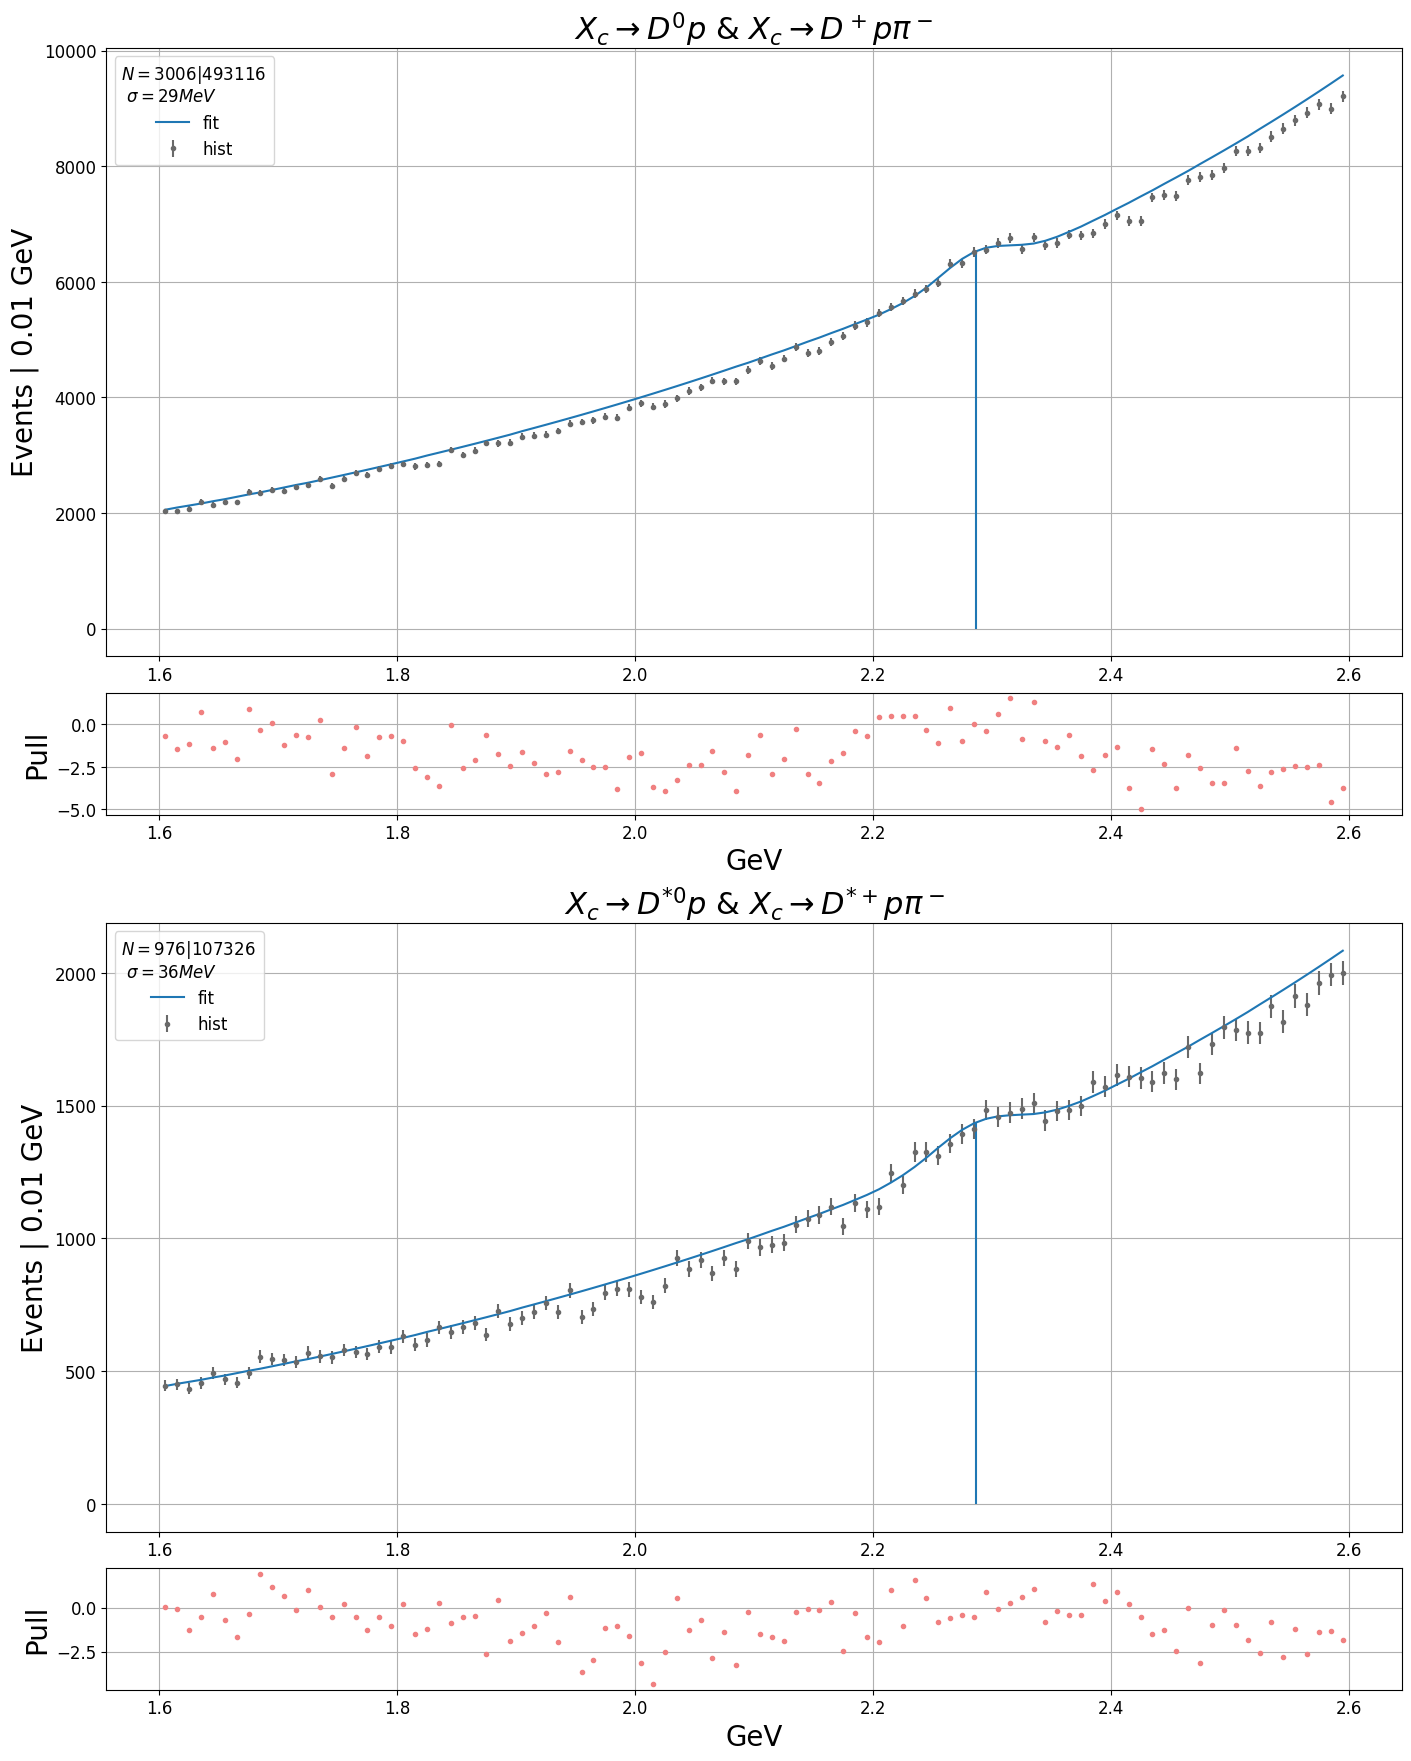

In [62]:
wbin = 0.01

fig, axs = plt.subplots(4, 1, figsize=(14, 14*2/1.6), gridspec_kw={'height_ratios': [1, 0.2, 1, 0.2]})

for ind, i in enumerate([(1, 2), (3, 4)]):
    dat = inc[(inc.rm2l < b) & (inc.rm2l > a) & (inc.ntr <= 3) & (inc.chxc.isin(i)) & (
              ((inc.chxc >= 3) & (np.abs(inc.dsm - inc.dm - 0.142014) < 0.003)) |
              ((inc.chxc <= 2) & (np.abs(inc.dm - D_0_m) < 0.015)))]    
    counts, bin_edges = np.histogram(dat.rm2l, bins=int((b-a)/wbin))
    bin_centers = bin_edges[:-1] + (bin_edges[1] - bin_edges[0])/2
    N = dat.shape[0]
    if ind == 0:
        args = (1.5e-02, 9.769e-01, 1.490e+00, 1.000e+00, 0.05, 1.477e-01, -4.431e-05, 0, 0, 0, 0)
    else:
        args = (0.03, 0.9729, 1.492, 1, 0.07, 0.1468, -1e-5, 0, 0, 0, 0)
    bounds = [(0, 1), (0, 1), (1, 2), (-1, 3), (0, 0.15), (0, 0.2), (-1e-2, 1e-2), (-1e-3, 1e-3), (-1e-3, 1e-3), (-1e-3, 1e-3), (-1e-3, 1e-3)]

    ax_main = axs[ind * 2]
    ax_main.errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt='.', color='dimgrey', label = "hist")
    minuit = Minuit(nll, *args)
    minuit.limits = bounds
    minuit.migrad()
    args = minuit.values
    print(args)
    title = " & ".join([decay_mod_taging[_-1] for _ in i])
    norm = N * wbin
    ax_main.vlines(Lamc_m, f_lam(Lamc_m, *args)*norm, 0)
    ax_main.plot(bin_centers, f_lam(bin_centers, *args)*norm, label = f"fit")
    ax_main.legend(title=f"$N = {N}$")
    ax_main.set_title(title)
    ax_main.set_ylabel(f'Events | {wbin} GeV')
    ax_main.grid()

    ax_main.legend(title = f"$N = {int(args[0]*N)} | {N}$ \n $\\sigma = {1000*args[4]:.0f} MeV$")

    residuals = counts - f_lam(bin_centers, *args) * norm
    ax_resid = axs[ind * 2 + 1]
    ax_resid.plot(bin_centers, residuals / np.sqrt(counts), '.', color='lightcoral')
    ax_resid.set_xlabel('GeV')
    ax_resid.set_ylabel('Pull')
    ax_resid.set_xlim(ax_main.get_xlim()) 
    ax_resid.grid()
    
plt.savefig(f"{path}inc_fit.png")
plt.show()


In [11]:
data = [re, mc]

NameError: name 're' is not defined

In [12]:
mc["chxc"] = pd.to_numeric(mc["chxc"])
mc["chlc"] = pd.to_numeric(mc["chlc"])
chxc = int(mc.chxc.max())


NameError: name 'mc' is not defined

In [13]:
decay_mod_taging = ["$X_c \\to D^0 p$", "$X_c \\to D^+ p \\pi^- $", "$X_c \\to D^{*0} p$", "$X_c \\to D^{*+} p \\pi^-$", "$X_c \\to \\Lambda_c^- \\pi^- \\pi^+$"]
decay_mod_tag = {"\\Lambda \\nu_l l": [lambda x: x <= 2, "L_nu_l"], "\\Lambda \\pi" : [lambda x: x == 3, "L_pi"], "p K \\pi" : [lambda x: x == 5, "p_k_pi"]}

In [61]:
D_star_0_gamm_mask = lambda dt: (np.abs(dt.mach - dt.machdt) < 0.010) & (dt.chach == 2) & (dt.chxc == 3)
D_star_0_pi_mask = lambda dt: (np.abs(dt.mach - dt.machdt) < 0.003) & (dt.chach == 1) & (dt.chxc == 3)
D_star_pm_pi_mask = lambda dt: (np.abs(dt.mach - dt.machdt) < 0.003) & ((dt.chach == 1) | (dt.chach == 2)) & (dt.chxc == 4)
D_star_mask = lambda dt: D_star_0_gamm_mask(dt) | D_star_0_pi_mask(dt) | D_star_pm_pi_mask(dt) | (dt.chxc == 1) | (dt.chxc == 2)
Lambda_c_mass_mask = lambda dt: np.abs(dt.mlc) < 0.015 
Privalov_cut = lambda dt: (np.abs(dt.p) < 0.05) & (np.abs(dt.e - dt.ecm) < 0.05)

TypeError: Axes.errorbar() missing 1 required positional argument: 'y'

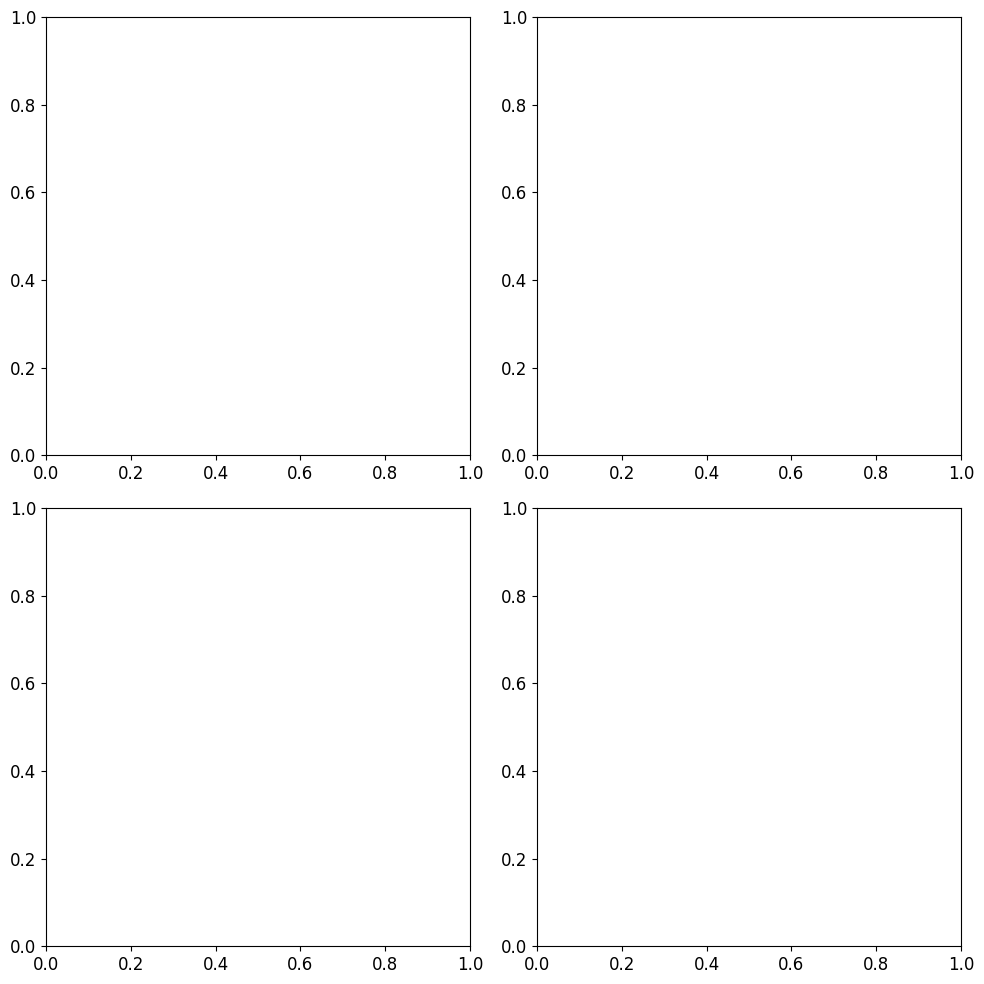

In [62]:
n = int(np.ceil(chxc**0.5))
wbin = 0.025
j = 0

for lam_cl, (condition, label) in decay_mod_tag.items():
    fig, axs = plt.subplots(chxc // n if chxc % n == 0 else chxc // n + 1, n, figsize=(5 * n, 5 * chxc // n if chxc % n == 0 else 5 * (chxc // n + 1)))
    fig.tight_layout()
    for i in range(chxc):
        dt = firs
        dat = dt[(dt.chxc == i + 1) & (np.abs(dt.rm2l - Lamc_m) < 0.5) & (condition(dt.chlc))]
        dt = re
        datt = dt[(dt.chxc == i + 1) & (np.abs(dt.rm2l - Lamc_m) < 0.5) & (condition(dt.chlc))]
        diw = np.linspace(min(dat["rm2l"]), max(dat["rm2l"]), int((-min(dat["rm2l"])+max(dat["rm2l"]))/wbin))
        axs[i // n, i % n].errorbar(datt["rm2l"], bins=diw, alpha=0.7, label = "mass fit")
        axs[i // n, i % n].errorbar(dat["rm2l"], bins=diw, alpha=0.7, label = "original")
        axs[i//n, i%n].legend()
        axs[i // n, i % n].set_title(decay_mod_taging[i], fontsize=20)
        axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}/GeV$", fontsize=20, loc='right')
        axs[i//n, i%n].set_xlim([Lamc_m-0.5, Lamc_m+0.5])

    if j == 0:
        fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ data$", fontsize=24)
        
        fig.savefig(f"{path}{label}_data.png")
    else:
        fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ mc$", fontsize=24)
        fig.savefig(f"{path}{label}_mc.png")
    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


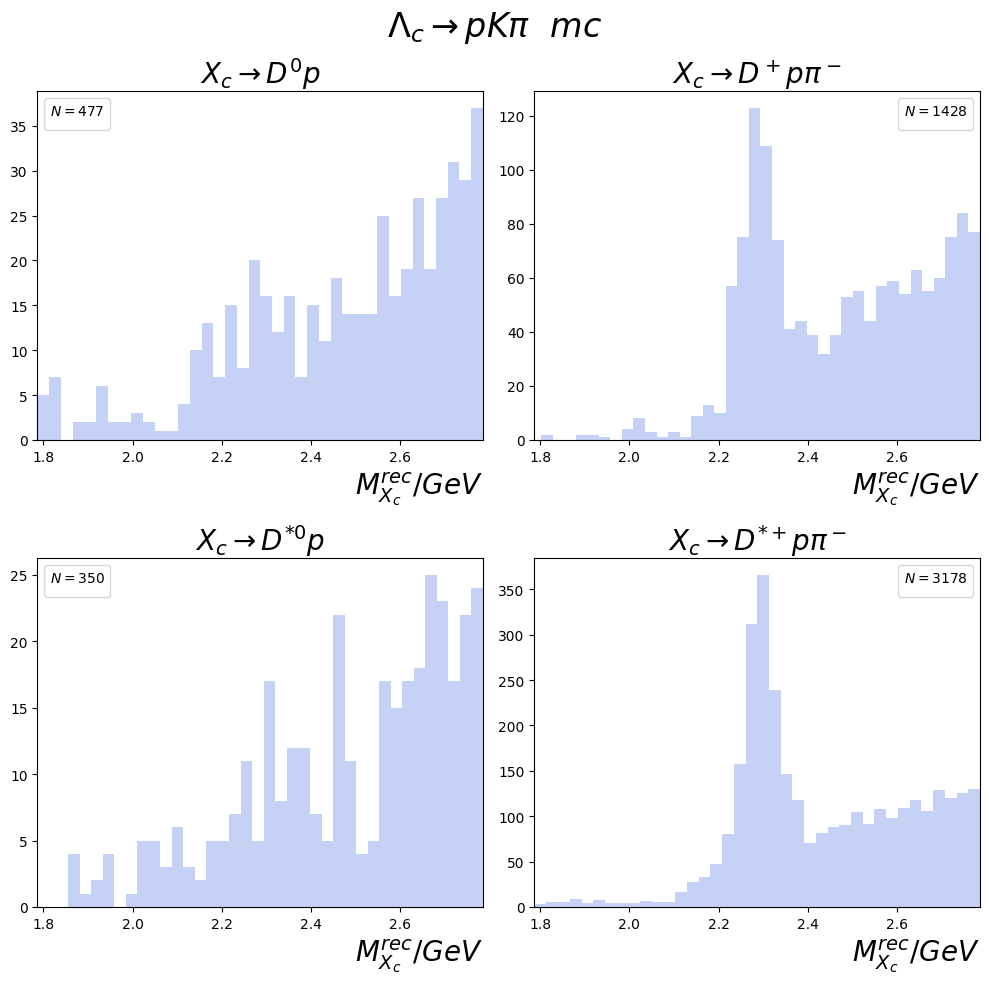

In [ ]:
n = int(np.ceil(chxc**0.5))
wbin = 0.025

j = 1
lam_cl = "p K \\pi"
label = decay_mod_tag[lam_cl][1]
condition = decay_mod_tag[lam_cl][0]
fig, axs = plt.subplots(chxc // n if chxc % n == 0 else chxc // n + 1, n, figsize=(5 * n, 5 * chxc // n if chxc % n == 0 else 5 * (chxc // n + 1)))
for i in range(chxc):
    dat = dt[(dt.chxc == i + 1) & (np.abs(dt.rm2l - Lamc_m) < 0.5) & (condition(dt.chlc))]
    diw = np.linspace(min(dat["rm2l"]), max(dat["rm2l"]), int((-min(dat["rm2l"])+max(dat["rm2l"]))/wbin))
    N = dat.shape[0]
    axs[i//n, i%n].legend(title = f"$N = {N}$")
    axs[i // n, i % n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i // n, i % n].hist(dat["rm2l"], bins=diw, alpha=0.3, color="royalblue")

    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}/GeV$", fontsize=20, loc='right')
    axs[i//n, i%n].set_xlim([Lamc_m-0.5, Lamc_m+0.5])

if j == 0:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ re$", fontsize=24)
    
    fig.savefig(f"{path}{label}_mc.png")
else:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ mc$", fontsize=24)
    fig.savefig(f"{path}{label}_re.png")
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


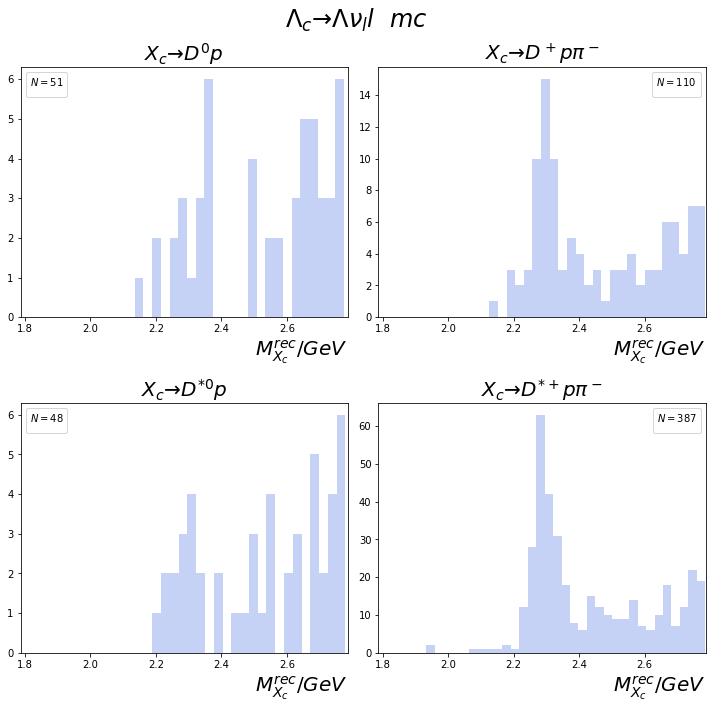

In [ ]:
n = int(np.ceil(chxc**0.5))
wbin = 0.025

j = 1
lam_cl = "\\Lambda \\nu_l l"
label = decay_mod_tag[lam_cl][1]
condition = decay_mod_tag[lam_cl][0]
fig, axs = plt.subplots(chxc // n if chxc % n == 0 else chxc // n + 1, n, figsize=(5 * n, 5 * chxc // n if chxc % n == 0 else 5 * (chxc // n + 1)))
for i in range(chxc):
    dat = dt[(dt.chxc == i + 1) & (np.abs(dt.rm2l - Lamc_m) < 0.5) & (condition(dt.chlc)) & (dt.tr_ach) & (dt.tr_lc)]
    diw = np.linspace(min(dat["rm2l"]), max(dat["rm2l"]), int((-min(dat["rm2l"])+max(dat["rm2l"]))/wbin))
    N = dat.shape[0]
    axs[i//n, i%n].legend(title = f"$N = {N}$")
    axs[i // n, i % n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i // n, i % n].hist(dat["rm2l"], bins=diw, alpha=0.3, color="royalblue")
    #if j == 1:
    #    dat = dt[(dt.chxc == i + 1) &  (condition(dt.chlc)) & (abs(Lamc_m - dt.rm2l) <= 0.6) & additional_mask & mask]
    #    axs[i // n, i % n].hist(dat["rm2l"], bins=nbins, alpha=0.3, color="dimgray")
    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}/GeV$", fontsize=20, loc='right')
    axs[i//n, i%n].set_xlim([Lamc_m-0.5, Lamc_m+0.5])

if j == 0:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ re$", fontsize=24)
    
    fig.savefig(f"{path}{label}_mc.png")
else:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ mc$", fontsize=24)
    fig.savefig(f"{path}{label}_re.png")
plt.tight_layout()
plt.show()

In [100]:

def convolution_meshed(x, g, f, fargs, gargs, delta = 0.1, N = 1000, mesh = None):
    # Оптимизированная функция поиска свертки двух функций опреденных на x
    # Условие применимости 
    # f - синальная функция на X и локализованная в центре X, пик узкий (хотя он может быть не один) если нет то надо расширить S
    # g - функция фонов, определена на S - mean(X)
    # S содержит X-mean(X) так чтобы for all xi in (X-mean(X))/S, x' in x => f(xi-x) << 1
    # Кароче s = [min(x)-delta, max(x)+delta] где delta полуширина пика   
    mu = np.mean(x)
    if not(mesh is None):
        x, s = np.meshgrid(x, mesh)
    else:
        x, s = np.meshgrid(x, np.linspace(np.min(x) - mu - delta, np.max(x) - mu + delta, N))
    return np.sum(g(s, *fargs)*f(x-s, *gargs), axis=0)/N

In [105]:
sq = njit(lambda x, c1, c2, b1, a1: c1 * np.sqrt((x - Pi_0_m) * heaviside(x, Pi_0_m)) * (1 + a1*eval_chebyt(1, x))  + c2 * np.sqrt(x * heaviside(x, 0)) * (1 + b1*eval_chebyt(1, x)))

signal_lam = njit(lambda x, mass1, A2, sigma1, sigma2: A2*gaussian(x, mass1, sigma1) + (1-A2)*gaussian(x, Lamc_m, sigma2))

def continuum_lam(x, mass1, A2, sigma1, sigma2, c0, c1, c2, b1, a1):
    return convolution_meshed(x, sq, signal_lam, [c1, c2, b1, a1], [mass1, A2, sigma1, sigma2], max(sigma1, sigma2)*10, mesh=np.linspace(-1, 1, 700)) + c0

f_lam = lambda x, A1, mass1, A2, sigma1, sigma2, c0, c1, c2, b1, a1: A1*signal_lam(x, mass1, A2, sigma1, sigma2) + (1-A1)*continuum_lam(x, mass1, A2, sigma1, sigma2, c0, c1, c2, b1, a1)

In [106]:
num_cores = multiprocessing.cpu_count()
print(f"Доступно ядер: {num_cores}")

Доступно ядер: 16


In [107]:
def process_channel(i, dt, Lamc_m, decay_mod_taging, label, j, res):
    try:
        mask = (dt.chlc <= 2) & (np.abs(dt.rm2l - Lamc_m) < 0.5)

        dat = dt[(dt.chxc == i + 1) & mask]

        counts, bin_edges = np.histogram(dat.rm2l, bins=150)
        bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2

        if f"fit_{label}_{decay_mod_taging[i]}_{j}" in res:
            args = res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][:-1]
        else:
            args = (2.5e-01, Lamc_m, 0.1, 1e-02, 1e-02, 1e-01, 5e-01, 5e-01, 0, 0)
        bounds = ((0, 1), (Lamc_m - 0.01, Lamc_m + 0.05), (0, 1), (0, 0.04), (0, 0.04), (0, 2), (0, 2), (0, 2), (-10, 10), (-10, 10))

        args, normm = max_bin_lik(f_lam, bin_centers, counts, args, bounds=bounds)

        ans = {f"fit_{label}_{decay_mod_taging[i]}_{j}" : list([*args, normm])}
        return ans

    except Exception as e:
        return {f"error_{i}": str(e)}

if __name__ == '__main__':
    lam_cl = "\\Lambda \\nu_l l"
    label = decay_mod_tag[lam_cl][1]

    with open('res.json', 'r') as file:
        res = json.load(file)

    pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())

    try:
        results = pool.starmap(process_channel, [(i//2, data[i%2], Lamc_m, decay_mod_taging, label, i%2, res) for i in range(2*chxc)])

    except Exception as e:
        print(f"An error occurred during multiprocessing: {e}")

    finally:
        pool.close()
        pool.join()

    for result in results:
        if isinstance(result, dict):
            for key in result:
                if key.startswith("error_"):
                    print(f"Error in channel {key.split('_')[1]}: {result[key]}")
                else:
                    res[key] = result[key]

    with open('res.json', 'w') as file:
        json.dump(res, file, indent=4)


/home/mar/Documents/data_ref/source.py:112: OptimizeWarning: Unknown solver options: xatol, fatol
  rez = minimize(df, args0, args=(bin_centers, counts), method = method, options={'xatol': h, 'fatol': h}, bounds=bounds)
/home/mar/Documents/data_ref/source.py:112: OptimizeWarning: Unknown solver options: xatol, fatol
  rez = minimize(df, args0, args=(bin_centers, counts), method = method, options={'xatol': h, 'fatol': h}, bounds=bounds)
/home/mar/Documents/data_ref/source.py:112: OptimizeWarning: Unknown solver options: xatol, fatol
  rez = minimize(df, args0, args=(bin_centers, counts), method = method, options={'xatol': h, 'fatol': h}, bounds=bounds)
/home/mar/Documents/data_ref/source.py:112: OptimizeWarning: Unknown solver options: xatol, fatol
  rez = minimize(df, args0, args=(bin_centers, counts), method = method, options={'xatol': h, 'fatol': h}, bounds=bounds)
/home/mar/Documents/data_ref/source.py:112: OptimizeWarning: Unknown solver options: xatol, fatol
  rez = minimize(df, a

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 150.81724212299355
       x: [ 5.267e-04  2.320e+00  1.353e-01  1.986e-02  3.992e-02
            1.861e+00  8.960e-03  6.398e-03 -7.205e-02 -5.769e-02]
     nit: 1
     jac: [-5.913e-04  0.000e+00 -3.815e-06  3.815e-06  1.526e-05
            0.000e+00 -1.678e-04 -2.060e-04  0.000e+00  0.000e+00]
    nfev: 11
    njev: 1

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 157.0042057686968
       x: [ 1.752e-01  2.279e+00  2.432e-01  3.076e-02  3.355e-02
            1.994e+00  4.325e-01  4.209e-01 -2.013e-02 -1.731e-02]
     nit: 8
     jac: [ 8.392e-05 -1.869e-04  7.629e-06  3.815e-06 -2.213e-04
            4.959e-05 -1.183e-04 -1.602e-04 -2.670e-05 -2.289e-05]
    nfev: 89
    njev: 8
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 157.4493308818989
       x: [ 1.187e-01  2.294e+00  1.702e-01  3.723e-02  2.828e-02
            1.874e+0

0.09745118699651745
0.07039807412063204


/tmp/ipykernel_59169/2504175106.py:32: RuntimeWarning: invalid value encountered in sqrt
  sigmas_12.append(sqrt(tau2*s1**2 + (1-tau2)*s2**2))


ValueError: cannot convert float NaN to integer

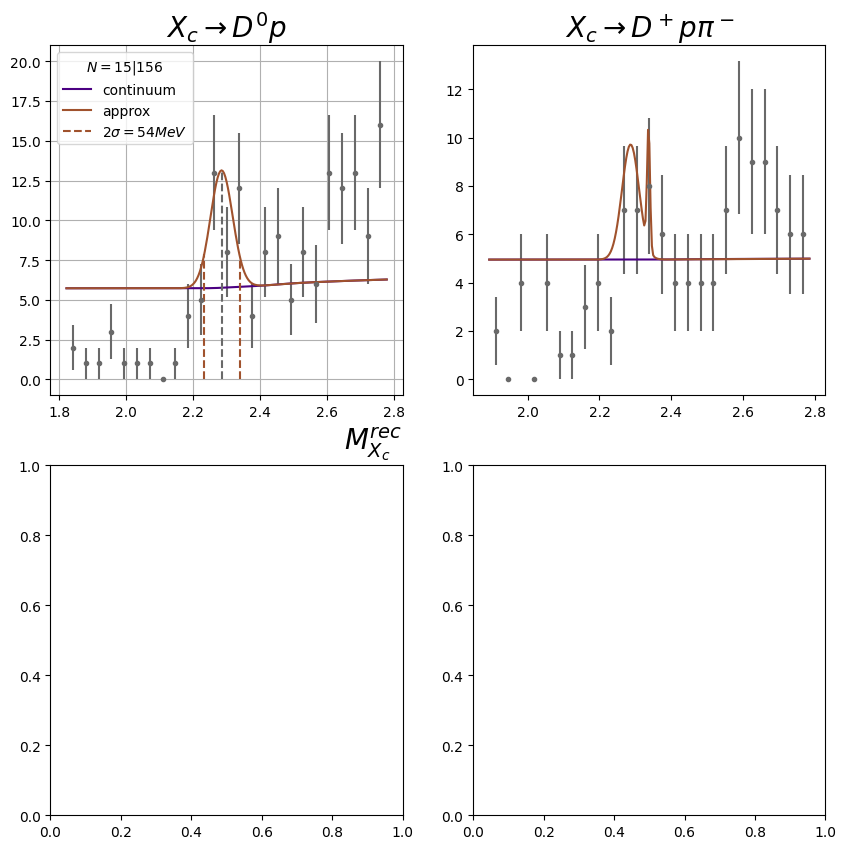

In [109]:
n = int(np.ceil(chxc**0.5))
nbins = 25
sigmas_12 = list()
fig, axs = plt.subplots(chxc//n if chxc%n == 0 else chxc//n + 1, n, figsize=(5*n, 5*chxc//n if chxc%n == 0 else 5*(chxc//n + 1)))
j = 0
dt = data[j]

lam_cl = "\\Lambda \\nu_l l"
label = decay_mod_tag[lam_cl][1]
with open('res.json', 'r') as file:
    res = json.load(file)

for i in range(chxc):
    mask = (dt.chlc <= 2)  & (np.abs(dt.rm2l - Lamc_m) < 0.5) 
    dat = dt[(dt.chxc == i + 1) & mask ]

    norm = dat.rm2l.shape[0]/nbins
    counts, bin_edges = np.histogram(dat.rm2l, bins=nbins)
    x = np.linspace(np.min(bin_edges), np.max(bin_edges), 251)
    bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
    axs[i//n, i%n].errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt ='.', color = 'dimgrey')

    args, normm = res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][:-1], res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][-1]
    in_sig = 1 - np.sum(continuum_lam(x, *args[1:])*(1-args[0]))/np.sum(f_lam(x, *args))
    print(in_sig)
    tau = args[0]
    axs[i//n, i%n].plot(x, continuum_lam(x, *args[1:])*(1-tau)*norm/normm, color = 'indigo', label = "continuum")
    axs[i//n, i%n].plot(x, f_lam(x, *args)*norm/normm, color = 'sienna', label = "approx")
    s1 = args[3]
    s2 = args[4]
    tau2 = args[1]
    sigmas_12.append(sqrt(tau2*s1**2 + (1-tau2)*s2**2))

    res[f"fit_{label}_{decay_mod_taging[i]}_{j}"] = list(args)

    axs[i//n, i%n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i//n, i%n].vlines((Lamc_m-2*sigmas_12[-1],Lamc_m+2*sigmas_12[-1]), (0, 0), 
                        (f_lam(Lamc_m-2*sigmas_12[-1], *args)*norm/normm, f_lam(Lamc_m+2*sigmas_12[-1], *args)*norm/normm), 
                        linestyle = '--', color = 'sienna', label = f"$2\\sigma = {round(2*sigmas_12[-1]*1000)} MeV$")
    axs[i//n, i%n].vlines((Lamc_m), (0), (f_lam(Lamc_m, *args)*norm/normm), linestyle = '--', color = 'dimgrey')
    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}$", fontsize=20, loc='right')
    axs[i//n, i%n].legend(title = f"$N = {int(in_sig*dat.rm2l.shape[0])} | {dat.rm2l.shape[0]}$")
    axs[i//n, i%n].grid()


if j == 1:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ mc$", fontsize=24)
    rm(f"{path}fit_{label}_mc.png")
    fig.savefig(f"{path}fit_{label}_mc.png")
else:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ re$", fontsize=24)
    rm(f"{path}{label}_re.png")
    fig.savefig(f"{path}fit_{label}_re.png")
plt.show()


0.22080746020685926
0.32440572777805987
0.17505669084966435
0.2289984927451153


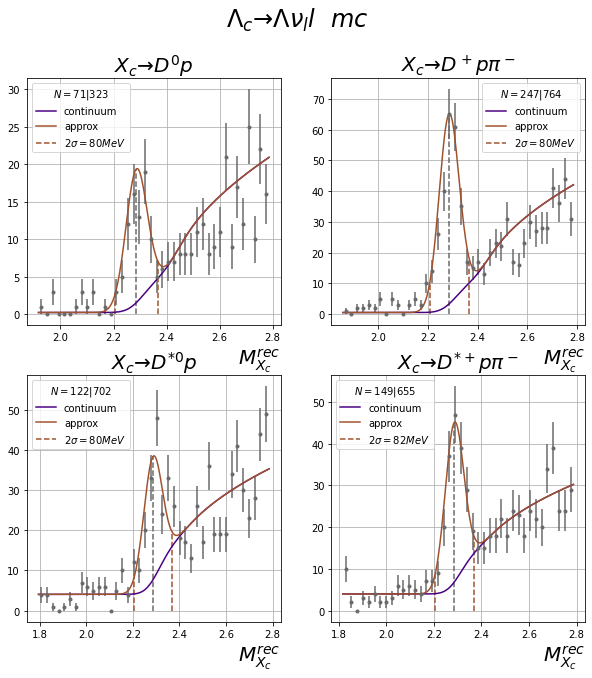

In [ ]:
n = int(np.ceil(chxc**0.5))
nbins = 40
sigmas_12 = list()
fig, axs = plt.subplots(chxc//n if chxc%n == 0 else chxc//n + 1, n, figsize=(5*n, 5*chxc//n if chxc%n == 0 else 5*(chxc//n + 1)))
j = 1
dt = data[j]

lam_cl = "\\Lambda \\nu_l l"
label = decay_mod_tag[lam_cl][1]
with open('Mat_belle/res.json', 'r') as file:
    res = json.load(file)

for i in range(chxc):
    mask = (dt.chlc <= 2)  & (np.abs(dt.rm2l - lamc_mass) < 0.5) 
    dat = dt[(dt.chxc == i + 1) & mask ]

    norm = dat.rm2l.shape[0]/nbins
    counts, bin_edges = np.histogram(dat.rm2l, bins=nbins)
    x = np.linspace(np.min(bin_edges), np.max(bin_edges), 251)
    bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
    axs[i//n, i%n].errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt ='.', color = 'dimgrey')

    args, normm = res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][:-1], res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][-1]
    in_sig = 1 - np.sum(continuum_lam(x, *args[1:])*(1-args[0]))/np.sum(f_lam(x, *args))
    print(in_sig)
    tau = args[0]
    axs[i//n, i%n].plot(x, continuum_lam(x, *args[1:])*(1-tau)*norm/normm, color = 'indigo', label = "continuum")
    axs[i//n, i%n].plot(x, f_lam(x, *args)*norm/normm, color = 'sienna', label = "approx")
    s1 = args[3]
    s2 = args[4]
    tau2 = args[1]
    sigmas_12.append(sqrt(tau2*s1**2 + (1-tau2)*s2**2))

    res[f"fit_{label}_{decay_mod_taging[i]}_{j}"] = list(args)

    axs[i//n, i%n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i//n, i%n].vlines((lamc_mass-2*sigmas_12[-1],lamc_mass+2*sigmas_12[-1]), (0, 0), 
                        (f_lam(lamc_mass-2*sigmas_12[-1], *args)*norm/normm, f_lam(lamc_mass+2*sigmas_12[-1], *args)*norm/normm), 
                        linestyle = '--', color = 'sienna', label = f"$2\\sigma = {round(2*sigmas_12[-1]*1000)} MeV$")
    axs[i//n, i%n].vlines((lamc_mass), (0), (f_lam(lamc_mass, *args)*norm/normm), linestyle = '--', color = 'dimgrey')
    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}$", fontsize=20, loc='right')
    axs[i//n, i%n].legend(title = f"$N = {int(in_sig*dat.rm2l.shape[0])} | {dat.rm2l.shape[0]}$")
    axs[i//n, i%n].grid()


if j == 1:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ mc$", fontsize=24)
    rm(f"{path}fit_{label}_mc.png")
    fig.savefig(f"{path}fit_{label}_mc.png")
else:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ re$", fontsize=24)
    rm(f"{path}{label}_re.png")
    fig.savefig(f"{path}fit_{label}_re.png")
plt.show()


/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


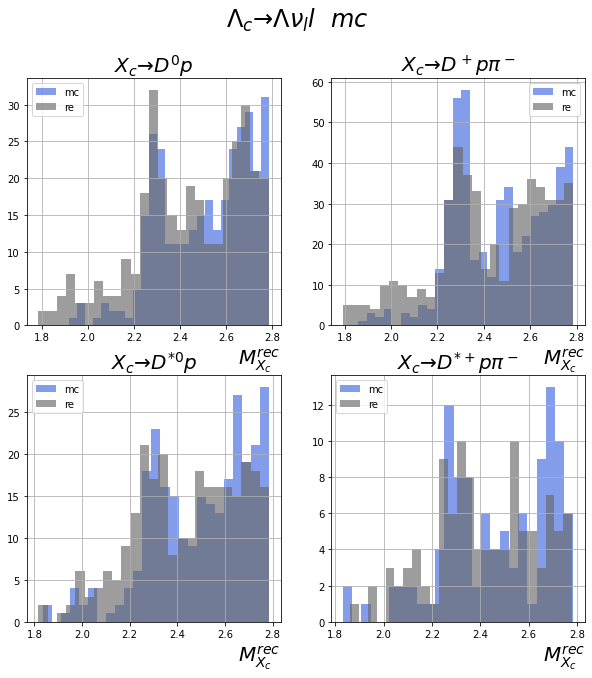

In [ ]:
n = int(np.ceil(chxc**0.5))
nbins = 25
sigmas_12 = list()
fig, axs = plt.subplots(chxc//n if chxc%n == 0 else chxc//n + 1, n, figsize=(5*n, 5*chxc//n if chxc%n == 0 else 5*(chxc//n + 1)))
dt_re = data[0]
dt_mc = data[1]

lam_cl = "\\Lambda \\nu_l l"
label = decay_mod_tag[lam_cl][1]

for i in range(chxc):
    mask_re = (dt_re.chlc <= 2)  & (np.abs(dt_re.rm2l - lamc_mass) < 0.5) 
    mask_mc = (dt_mc.chlc <= 2)  & (np.abs(dt_mc.rm2l - lamc_mass) < 0.5) 
    re = dt_re[(dt.chxc == i + 1) & mask_re].rm2l
    mc = dt_mc[(dt.chxc == i + 1) & mask_mc].rm2l

    min_size = min(len(mc), len(re))
    if len(mc) > min_size:
        mc = np.random.choice(mc, min_size, replace=False)
    elif len(re) > min_size:
        re = np.random.choice(re, min_size, replace=False)

    axs[i//n, i%n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i // n, i % n].hist(mc, bins=nbins, alpha=0.65, color="royalblue", label = "mc")
    axs[i // n, i % n].hist(re, bins=nbins, alpha=0.65, color="dimgray", label = "re")
    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}$", fontsize=20, loc='right')
    axs[i//n, i%n].legend()
    axs[i//n, i%n].grid()

if j == 1:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ mc$", fontsize=24)
    rm(f"{path}fit_{label}_mc.png")
    fig.savefig(f"{path}fit_{label}_mc.png")
else:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ re$", fontsize=24)
    rm(f"{path}{label}_re.png")
    fig.savefig(f"{path}fit_{label}_re.png")
plt.show()


/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


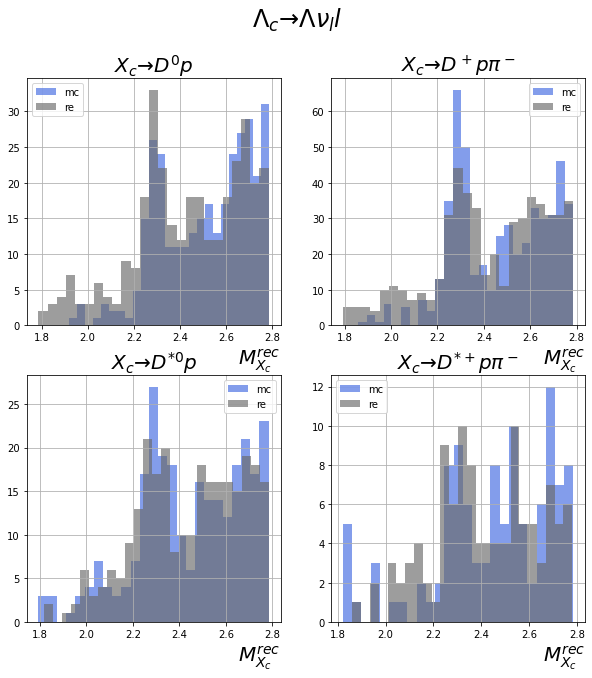

In [ ]:
n = int(np.ceil(chxc**0.5))
nbins = 25
sigmas_12 = list()
fig, axs = plt.subplots(chxc//n if chxc%n == 0 else chxc//n + 1, n, figsize=(5*n, 5*chxc//n if chxc%n == 0 else 5*(chxc//n + 1)))
dt_re = data[0]
dt_mc = data[1]

lam_cl = "\\Lambda \\nu_l l"
label = decay_mod_tag[lam_cl][1]

for i in range(chxc):
    mask_re = (dt_re.chlc <= 2)  & (np.abs(dt_re.rm2l - lamc_mass) < 0.5) 
    mask_mc = (dt_mc.chlc <= 2)  & (np.abs(dt_mc.rm2l - lamc_mass) < 0.5) 
    re = dt_re[(dt.chxc == i + 1) & mask_re].rm2l
    mc = dt_mc[(dt.chxc == i + 1) & mask_mc].rm2l

    min_size = min(len(mc), len(re))
    if len(mc) > min_size:
        mc = np.random.choice(mc, min_size, replace=False)
    elif len(re) > min_size:
        re = np.random.choice(re, min_size, replace=False)

    axs[i//n, i%n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i // n, i % n].hist(mc, bins=nbins, alpha=0.65, color="royalblue", label = "mc")
    axs[i // n, i % n].hist(re, bins=nbins, alpha=0.65, color="dimgray", label = "re")
    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}$", fontsize=20, loc='right')
    axs[i//n, i%n].legend()
    axs[i//n, i%n].grid()

fig.suptitle(f"$\\Lambda_c \\to {lam_cl}$", fontsize=24)
rm(f"{path}comp_{label}_mc.png")
fig.savefig(f"{path}comp_{label}_mc.png")

plt.show()


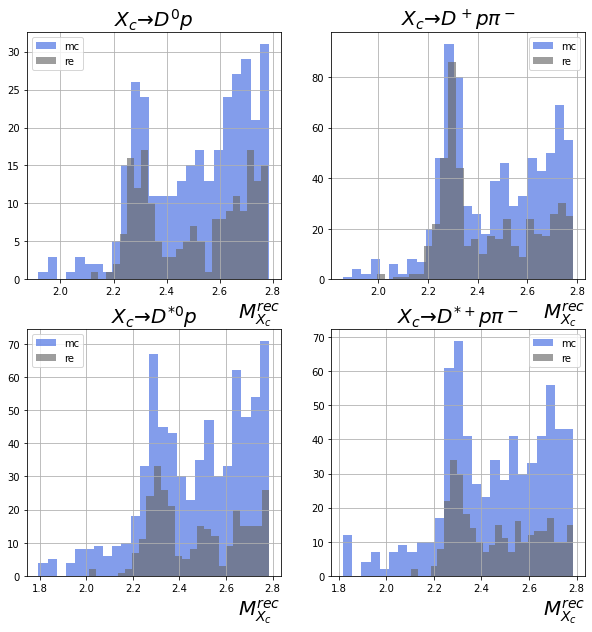

In [ ]:
n = int(np.ceil(chxc**0.5))
nbins = 25
sigmas_12 = list()
fig, axs = plt.subplots(chxc//n if chxc%n == 0 else chxc//n + 1, n, figsize=(5*n, 5*chxc//n if chxc%n == 0 else 5*(chxc//n + 1)))
dt_mc = data[1]

lam_cl = "\\Lambda \\nu_l l"
label = decay_mod_tag[lam_cl][1]


for i in range(chxc):
    mask_mc = (dt_mc.chlc <= 2)  & (np.abs(dt_mc.rm2l - lamc_mass) < 0.5)
    re = dt_mc[(dt_mc.chxc == i + 1) & mask_mc & dt_mc.tr_ach].rm2l
    mc = dt_mc[(dt_mc.chxc == i + 1) & mask_mc].rm2l


    axs[i//n, i%n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i // n, i % n].hist(mc, bins=nbins, alpha=0.65, color="royalblue", label = "mc")
    axs[i // n, i % n].hist(re, bins=nbins, alpha=0.65, color="dimgray", label = "re")
    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}$", fontsize=20, loc='right')
    axs[i//n, i%n].legend()
    axs[i//n, i%n].grid()

In [ ]:
D_star_0_gamm_mask = lambda dt: (np.abs(dt.mach - dt.machdt) < 0.010) & (dt.chach == 2) & (dt.chxc == 3)
D_star_0_pi_mask = lambda dt: (np.abs(dt.mach - dt.machdt) < 0.003) & (dt.chach == 1) & (dt.chxc == 3)
D_star_pm_pi_mask = lambda dt: (np.abs(dt.mach - dt.machdt) < 0.003) & ((dt.chach == 1) | (dt.chach == 2)) & (dt.chxc == 4)
D_star_mask = lambda dt: D_star_0_gamm_mask(dt) | D_star_0_pi_mask(dt) | D_star_pm_pi_mask(dt) | (dt.chxc == 1) | (dt.chxc == 2)
Lambda_c_mass_mask = lambda dt: np.abs(dt.mlc) < 0.015 
Privalov_cut = lambda dt: (np.abs(dt.p) < 0.05) & (np.abs(dt.e - dt.ecm) < 0.05)

In [ ]:
def process_channel(i, dt, lamc_mass, decay_mod_taging, label, j, res):
    try:
        mask = (dt.chlc == 5) & (np.abs(dt.rm2l - lamc_mass) < 0.5)
        add_mask = D_star_mask(dt) & Lambda_c_mass_mask(dt)

        dat = dt[(dt.chxc == i + 1) & mask ]

        counts, bin_edges = np.histogram(dat.rm2l, bins=150)
        bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2

        if f"fit_{label}_{decay_mod_taging[i]}_{j}" in res:
            args = res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][:-1]
        else:
            args = (2.5e-01, lamc_mass, 0.1, 1e-02, 1e-02, 1e-01, 5e-01, 5e-01, 0, 0)
        bounds = ((0, 1), (lamc_mass - 0.01, lamc_mass + 0.05), (0, 1), (0, 0.04), (0, 0.04), (0, 2), (0, 2), (0, 2), (-10, 10), (-10, 10))

        args, normm = max_bin_lik(f_lam, bin_centers, counts, args, bounds=bounds)

        ans = {f"fit_{label}_{decay_mod_taging[i]}_{j}" : list([*args, normm])}
        return ans

    except Exception as e:
        return {f"error_{i}": str(e)}

if __name__ == '__main__':
    lam_cl = "p K \\pi"
    label = decay_mod_tag[lam_cl][1]

    with open('Mat_belle/res.json', 'r') as file:
        res = json.load(file)

    pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())

    try:
        results = pool.starmap(process_channel, [(i//2, data[i%2], lamc_mass, decay_mod_taging, label, i%2, res) for i in range(2*chxc)])

    except Exception as e:
        print(f"An error occurred during multiprocessing: {e}")

    finally:
        pool.close()
        pool.join()

    for result in results:
        if isinstance(result, dict):
            for key in result:
                if key.startswith("error_"):
                    print(f"Error in channel {key.split('_')[1]}: {result[key]}")
                else:
                    res[key] = result[key]

    with open('Mat_belle/res.json', 'w') as file:
        json.dump(res, file, indent=4)


/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  
/gpfs/

     fun: 150.1695272179614
     jac: array([ 7.32421875e-04,  1.37329102e-04,  7.62939453e-06, -4.68063354e-03,
       -2.09484100e-02, -1.06811523e-04,  2.80380249e-04,  2.84194946e-04,
        4.38690186e-05,  2.28881836e-05])
 message: 'Optimization terminated successfully'
    nfev: 23
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ 0.01811664,  2.27648489,  0.15213026,  0.04      ,  0.04      ,
        2.        ,  0.29744522,  0.40392893, -0.04442099, -0.03914425])

     fun: 152.3785386681298
     jac: array([ 7.47680664e-04,  2.47955322e-04, -1.90734863e-06, -3.06510925e-03,
       -9.24110413e-03, -4.76837158e-05,  1.31607056e-04,  9.72747803e-05,
        4.00543213e-05,  1.14440918e-05])
 message: 'Optimization terminated successfully'
    nfev: 33
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 0.0270771 ,  2.27646   ,  0.17835567,  0.04      ,  0.04      ,
        2.        ,  0.15387812,  0.52825255, -0.09676879, -0.10245167])
   

0.2672640442018479
0.3462868751430036
0.1911102932398525
0.2609210749492695


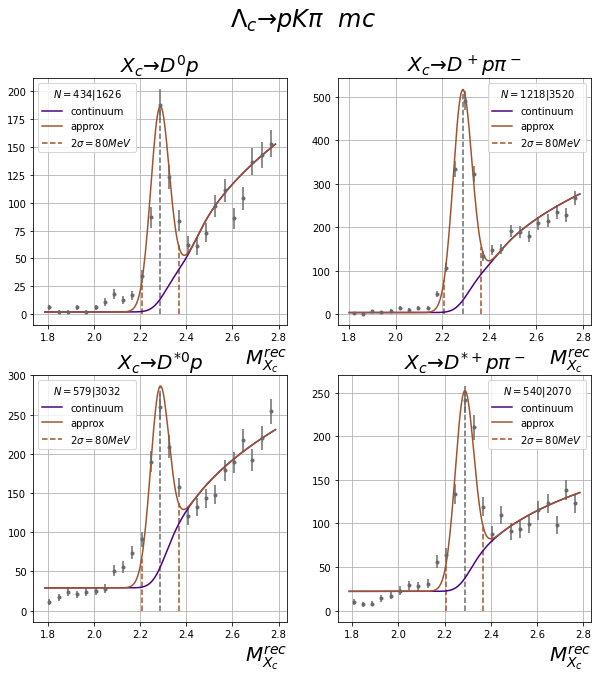

In [ ]:
n = int(np.ceil(chxc**0.5))
nbins = 25
fig, axs = plt.subplots(chxc//n if chxc%n == 0 else chxc//n + 1, n, figsize=(5*n, 5*chxc//n if chxc%n == 0 else 5*(chxc//n + 1)))
j = 1
dt = data[j]

lam_cl = "p K \\pi"
label = decay_mod_tag[lam_cl][1]
with open('Mat_belle/res.json', 'r') as file:
    res = json.load(file)

for i in range(chxc):
    add_mask = Lambda_c_mass_mask(dt) & D_star_mask(dt)
    mask = (dt.chlc == 5)  & (np.abs(dt.rm2l - lamc_mass) < 0.5)
    dat = dt[(dt.chxc == i + 1) & mask]

    norm = dat.rm2l.shape[0]/nbins
    counts, bin_edges = np.histogram(dat.rm2l, bins=nbins)
    x = np.linspace(np.min(bin_edges), np.max(bin_edges), 251)
    bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
    axs[i//n, i%n].errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt ='.', color = 'dimgrey')

    args, normm = res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][:-1], res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][-1]
    in_sig = 1 - np.sum(continuum_lam(x, *args[1:])*(1-args[0]))/np.sum(f_lam(x, *args))
    print(in_sig)
    tau = args[0]
    axs[i//n, i%n].plot(x, continuum_lam(x, *args[1:])*(1-tau)*norm/normm, color = 'indigo', label = "continuum")
    axs[i//n, i%n].plot(x, f_lam(x, *args)*norm/normm, color = 'sienna', label = "approx")
    s1 = args[3]
    s2 = args[4]
    tau2 = args[1]
    sigmas_12.append(sqrt(tau2*s1**2 + (1-tau2)*s2**2))

    res[f"fit_{label}_{decay_mod_taging[i]}_{j}"] = list(args)

    axs[i//n, i%n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i//n, i%n].vlines((lamc_mass-2*sigmas_12[-1],lamc_mass+2*sigmas_12[-1]), (0, 0), 
                        (f_lam(lamc_mass-2*sigmas_12[-1], *args)*norm/normm, f_lam(lamc_mass+2*sigmas_12[-1], *args)*norm/normm), 
                        linestyle = '--', color = 'sienna', label = f"$2\\sigma = {round(2*sigmas_12[-1]*1000)} MeV$")
    axs[i//n, i%n].vlines((lamc_mass), (0), (f_lam(lamc_mass, *args)*norm/normm), linestyle = '--', color = 'dimgrey')
    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}$", fontsize=20, loc='right')
    axs[i//n, i%n].legend(title = f"$N = {int(in_sig*dat.rm2l.shape[0])} | {dat.rm2l.shape[0]}$")
    axs[i//n, i%n].grid()

if j == 1:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ mc$", fontsize=24)
    rm(f"{path}fit_{label}_mc.png")
    fig.savefig(f"{path}fit_{label}_mc.png")
else:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ re$", fontsize=24)
    rm(f"{path}{label}_re.png")
    fig.savefig(f"{path}fit_{label}_re.png")
plt.show()


0.18620971121421614
0.20321505683312302
0.13229393421773927
0.1415441118606865
The file does not exist


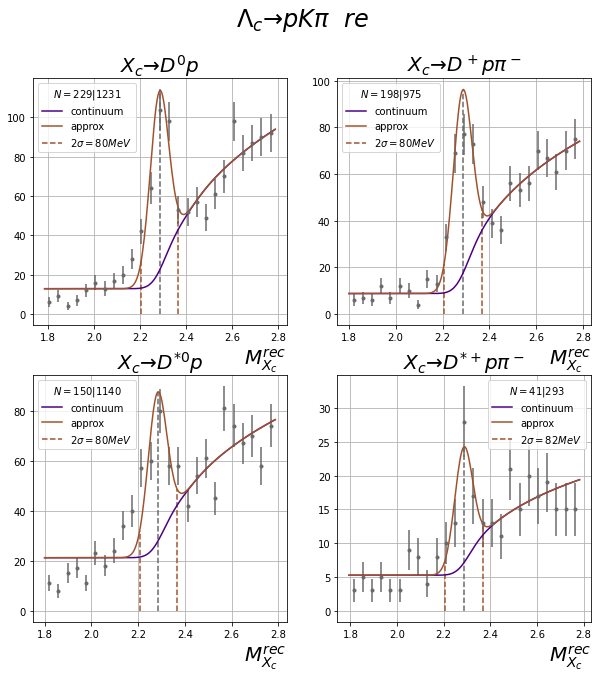

In [ ]:
n = int(np.ceil(chxc**0.5))
nbins = 25
sigmas_12 = list()
fig, axs = plt.subplots(chxc//n if chxc%n == 0 else chxc//n + 1, n, figsize=(5*n, 5*chxc//n if chxc%n == 0 else 5*(chxc//n + 1)))
j = 0
dt = data[j]

lam_cl = "p K \\pi"
label = decay_mod_tag[lam_cl][1]
with open('Mat_belle/res.json', 'r') as file:
    res = json.load(file)

for i in range(chxc):
    add_mask = Lambda_c_mass_mask(dt) & D_star_mask(dt)
    mask = (dt.chlc == 5)  & (np.abs(dt.rm2l - lamc_mass) < 0.5)
    dat = dt[(dt.chxc == i + 1) & mask ]

    norm = dat.rm2l.shape[0]/nbins
    counts, bin_edges = np.histogram(dat.rm2l, bins=nbins)
    x = np.linspace(np.min(bin_edges), np.max(bin_edges), 251)
    bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
    axs[i//n, i%n].errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt ='.', color = 'dimgrey')

    args, normm = res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][:-1], res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][-1]
    in_sig = 1 - np.sum(continuum_lam(x, *args[1:])*(1-args[0]))/np.sum(f_lam(x, *args))
    print(in_sig)
    tau = args[0]
    axs[i//n, i%n].plot(x, continuum_lam(x, *args[1:])*(1-tau)*norm/normm, color = 'indigo', label = "continuum")
    axs[i//n, i%n].plot(x, f_lam(x, *args)*norm/normm, color = 'sienna', label = "approx")
    s1 = args[3]
    s2 = args[4]
    tau2 = args[1]
    sigmas_12.append(sqrt(tau2*s1**2 + (1-tau2)*s2**2))

    res[f"fit_{label}_{decay_mod_taging[i]}_{j}"] = list(args)

    axs[i//n, i%n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i//n, i%n].vlines((lamc_mass-2*sigmas_12[-1],lamc_mass+2*sigmas_12[-1]), (0, 0), 
                        (f_lam(lamc_mass-2*sigmas_12[-1], *args)*norm/normm, f_lam(lamc_mass+2*sigmas_12[-1], *args)*norm/normm), 
                        linestyle = '--', color = 'sienna', label = f"$2\\sigma = {round(2*sigmas_12[-1]*1000)} MeV$")
    axs[i//n, i%n].vlines((lamc_mass), (0), (f_lam(lamc_mass, *args)*norm/normm), linestyle = '--', color = 'dimgrey')
    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}$", fontsize=20, loc='right')
    axs[i//n, i%n].legend(title = f"$N = {int(in_sig*dat.rm2l.shape[0])} | {dat.rm2l.shape[0]}$")
    axs[i//n, i%n].grid()

if j == 1:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ mc$", fontsize=24)
    rm(f"{path}fit_{label}_mc.png")
    fig.savefig(f"{path}fit_{label}_mc.png")
else:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ re$", fontsize=24)
    rm(f"{path}{label}_re.png")
    fig.savefig(f"{path}fit_{label}_re.png")
plt.show()


/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


The file does not exist


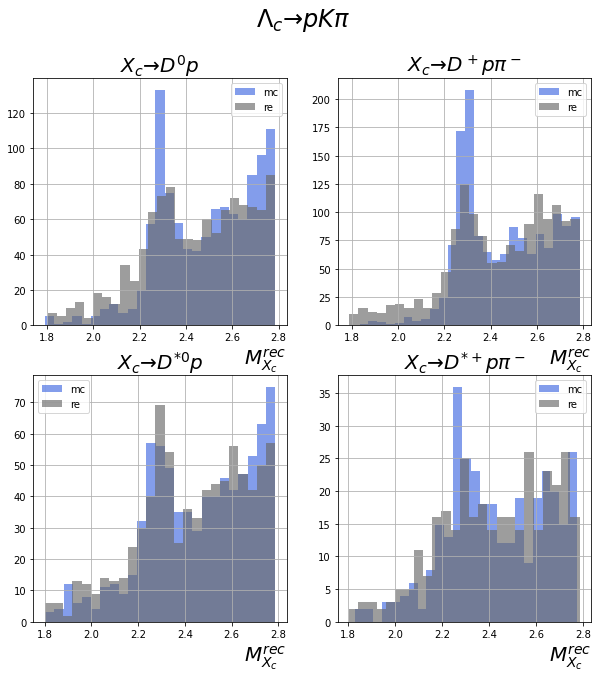

In [ ]:
n = int(np.ceil(chxc**0.5))
nbins = 25
sigmas_12 = list()
fig, axs = plt.subplots(chxc//n if chxc%n == 0 else chxc//n + 1, n, figsize=(5*n, 5*chxc//n if chxc%n == 0 else 5*(chxc//n + 1)))
dt_re = data[0]
dt_mc = data[1]

lam_cl = "p K \\pi"
label = decay_mod_tag[lam_cl][1]


for i in range(chxc):
    mask_re = (dt_re.chlc == 5)  & (np.abs(dt_re.rm2l - lamc_mass) < 0.5)
    mask_mc = (dt_mc.chlc == 5)  & (np.abs(dt_mc.rm2l - lamc_mass) < 0.5)
    re = dt_re[(dt.chxc == i + 1) & mask_re].rm2l
    mc = dt_mc[(dt.chxc == i + 1) & mask_mc].rm2l

    min_size = min(len(mc), len(re))
    if len(mc) > min_size:
        mc = np.random.choice(mc, min_size, replace=False)
    elif len(re) > min_size:
        re = np.random.choice(re, min_size, replace=False)

    axs[i//n, i%n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i // n, i % n].hist(mc, bins=nbins, alpha=0.65, color="royalblue", label = "mc")
    axs[i // n, i % n].hist(re, bins=nbins, alpha=0.65, color="dimgray", label = "re")
    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}$", fontsize=20, loc='right')
    axs[i//n, i%n].legend()
    axs[i//n, i%n].grid()


fig.suptitle(f"$\\Lambda_c \\to {lam_cl}$", fontsize=24)
rm(f"{path}comp_{label}_re.png")
fig.savefig(f"{path}comp_{label}_re.png")



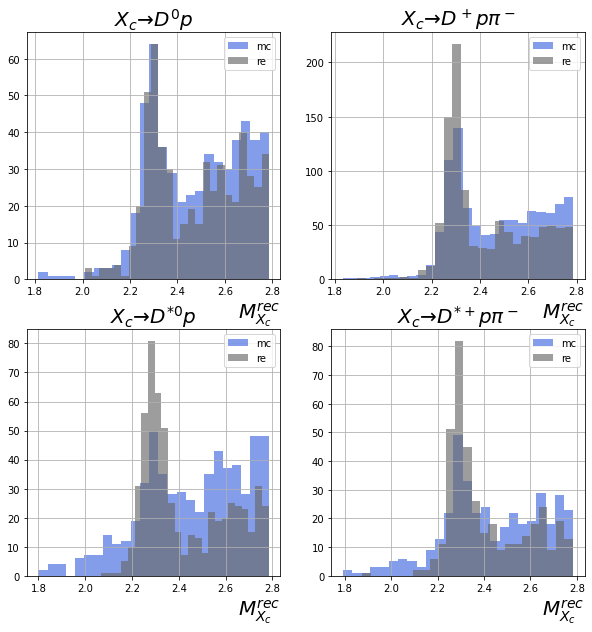

In [ ]:
n = int(np.ceil(chxc**0.5))
nbins = 25
sigmas_12 = list()
fig, axs = plt.subplots(chxc//n if chxc%n == 0 else chxc//n + 1, n, figsize=(5*n, 5*chxc//n if chxc%n == 0 else 5*(chxc//n + 1)))
dt_mc = data[1]

lam_cl = "p K \\pi"
label = decay_mod_tag[lam_cl][1]


for i in range(chxc):
    add_mask_mc = Lambda_c_mass_mask(dt_mc) & D_star_mask(dt_mc)
    mask_mc = (dt_mc.chlc == 5)  & (np.abs(dt_mc.rm2l - lamc_mass) < 0.5)
    re = dt_mc[(dt_mc.chxc == i + 1) & mask_mc & dt_mc.tr_ach & dt_mc.tr_lc].rm2l
    mc = dt_mc[(dt_mc.chxc == i + 1) & mask_mc].rm2l


    axs[i//n, i%n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i // n, i % n].hist(mc, bins=nbins, alpha=0.65, color="royalblue", label = "mc")
    axs[i // n, i % n].hist(re, bins=nbins, alpha=0.65, color="dimgray", label = "re")
    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}$", fontsize=20, loc='right')
    axs[i//n, i%n].legend()
    axs[i//n, i%n].grid()



No handles with labels found to put in legend.
No handles with labels found to put in legend.


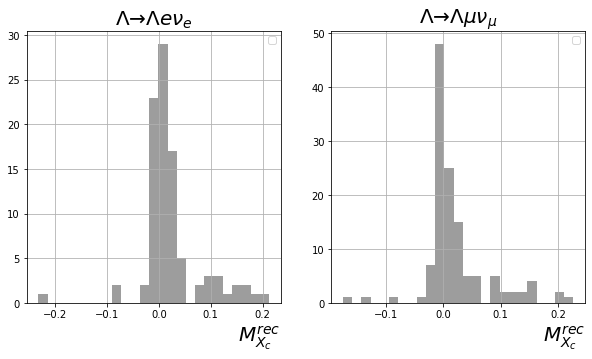

In [ ]:
n = 2
nbins = 25
sigmas_12 = list()
fig, axs = plt.subplots(1, 2, figsize=(5*n, 5*2//n if 2%n == 0 else 5*(2//n + 1)))
dt_re = data[1]

lam_cl = "p K \\pi"
label = decay_mod_tag[lam_cl][1]
lmc = ["$\\Lambda \\to \\Lambda e \\nu_e$", "$\\Lambda \\to \\Lambda \\mu \\nu_\\mu$"]

for i in [1, 2]:
    mask_re = (dt_re.chlc == i) & (dt_re.ecm > 0.05) & (np.abs(dt_re.nrm2n) < 0.25) & (dt_re.p > 0.05) & (dt_re.q2 > 0) & (dt_re.q2 < 1.37) & (np.abs(dt_mc.rm2l - 2.29) < 0.1)
    re = dt_re[(dt_re.chxc <= 2) & mask_re].nrm2n

    axs[i-1].set_title(lmc[i-1], fontsize=20)
    axs[i-1].hist(re, bins=nbins, alpha=0.65, color="dimgray")
    axs[i-1].set_xlabel("$M^{rec}_{X_c}$", fontsize=20, loc='right')
    axs[i-1].legend()
    axs[i-1].grid()



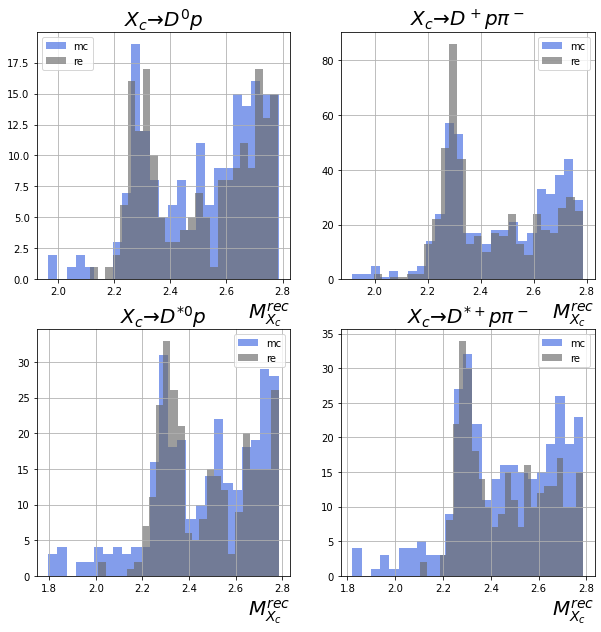

In [ ]:
n = int(np.ceil(chxc**0.5))
nbins = 25
sigmas_12 = list()
fig, axs = plt.subplots(chxc//n if chxc%n == 0 else chxc//n + 1, n, figsize=(5*n, 5*chxc//n if chxc%n == 0 else 5*(chxc//n + 1)))
dt_mc = data[1]

lam_cl = "p K \\pi"
label = decay_mod_tag[lam_cl][1]


for i in range(chxc):
    add_mask_mc = Lambda_c_mass_mask(dt_mc) & D_star_mask(dt_mc)
    mask_mc = (dt_mc.chlc <= 2)  & (np.abs(dt_mc.rm2l - lamc_mass) < 0.5)
    re = dt_mc[(dt_mc.chxc == i + 1) & mask_mc & dt_mc.tr_ach].rm2l
    mc = dt_mc[(dt_mc.chxc == i + 1) & mask_mc].rm2l

    min_size = min(len(mc), len(re))
    if len(mc) > min_size:
        mc = np.random.choice(mc, min_size, replace=False)
    elif len(re) > min_size:
        re = np.random.choice(re, min_size, replace=False)

    axs[i//n, i%n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i // n, i % n].hist(mc, bins=nbins, alpha=0.65, color="royalblue", label = "mc")
    axs[i // n, i % n].hist(re, bins=nbins, alpha=0.65, color="dimgray", label = "re")
    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}$", fontsize=20, loc='right')
    axs[i//n, i%n].legend()
    axs[i//n, i%n].grid()



In [ ]:
def process_channel(i, dt, lamc_mass, decay_mod_taging, label, j, res):
    try:
        mask = (dt.chlc == 3) & (np.abs(dt.rm2l - lamc_mass) < 0.5)

        dat = dt[(dt.chxc == i + 1) & mask]

        counts, bin_edges = np.histogram(dat.rm2l, bins=150)
        bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2

        if f"fit_{label}_{decay_mod_taging[i]}_{j}" in res:
            args = res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][:-1]
        else:
            args = (2.5e-01, lamc_mass, 0.1, 1e-02, 1e-02, 1e-01, 5e-01, 5e-01, 0, 0)
        bounds = ((0, 1), (lamc_mass - 0.01, lamc_mass + 0.05), (0, 1), (0, 0.04), (0, 0.04), (0, 2), (0, 2), (0, 2), (-10, 10), (-10, 10))

        args, normm = max_bin_lik(f_lam, bin_centers, counts, args, bounds=bounds)

        ans = {f"fit_{label}_{decay_mod_taging[i]}_{j}" : list([*args, normm])}
        return ans

    except Exception as e:
        return {f"error_{i}": str(e)}

if __name__ == '__main__':
    lam_cl = "\\Lambda \\pi"
    label = decay_mod_tag[lam_cl][1]

    with open('Mat_belle/res.json', 'r') as file:
        res = json.load(file)

    pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())

    try:
        results = pool.starmap(process_channel, [(i//2, data[i%2], lamc_mass, decay_mod_taging, label, i%2, res) for i in range(2*chxc)])

    except Exception as e:
        print(f"An error occurred during multiprocessing: {e}")

    finally:
        pool.close()
        pool.join()

    for result in results:
        if isinstance(result, dict):
            for key in result:
                if key.startswith("error_"):
                    print(f"Error in channel {key.split('_')[1]}: {result[key]}")
                else:
                    res[key] = result[key]

    with open('Mat_belle/res.json', 'w') as file:
        json.dump(res, file, indent=4)


/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  
/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  


     fun: 162.91250289627138
     jac: array([-4.39643860e-03, -2.02178955e-04,  2.86102295e-05, -7.51495361e-04,
       -6.10542297e-03,  0.00000000e+00,  1.30271912e-03,  1.37329102e-04,
        2.09808350e-05,  0.00000000e+00])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([ 1.02152347e-03,  2.27725753e+00,  8.64212851e-02,  4.00000000e-02,
        3.99881077e-02,  1.92251731e+00,  3.32213147e-15,  3.46125069e-02,
       -1.22756156e-01, -8.52819747e-02])


/gpfs/home/belle2/matrk/.venv/lib64/python3.6/site-packages/ipykernel_launcher.py:8: OptimizeWarning: Unknown solver options: xatol, fatol
  


     fun: 191.07340553166347
     jac: array([ 3.62396240e-05,  8.18252563e-04, -3.81469727e-05, -2.17056274e-03,
       -9.17816162e-03, -3.81469727e-05,  1.67846680e-04,  1.06811523e-04,
        1.52587891e-05, -1.90734863e-06])
 message: 'Optimization terminated successfully'
    nfev: 11
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([ 0.02024073,  2.27646   ,  0.20362938,  0.04      ,  0.04      ,
        2.        ,  0.07335605,  0.66861903, -0.05784597, -0.07332873])

     fun: 175.55890466399484
     jac: array([-6.48498535e-04,  5.21087646e-03, -1.20162964e-04, -1.66358948e-02,
       -3.39012146e-02, -1.81198120e-04,  3.87191772e-04,  3.58581543e-04,
        1.06811523e-04,  5.91278076e-05])
 message: 'Optimization terminated successfully'
    nfev: 11
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([ 0.01401435,  2.27646   ,  0.34556005,  0.04      ,  0.04      ,
        2.        ,  0.3981279 ,  0.61646736, -0.01975225, -0.02801533])
 

0.18398870301224646
0.16415880412761896
0.1517487832816482


0.162963672666674
The file does not exist


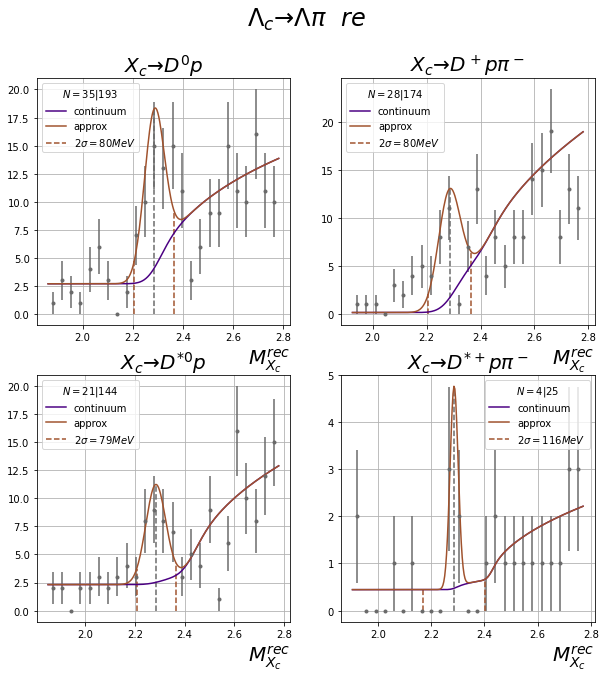

In [ ]:
n = int(np.ceil(chxc**0.5))
nbins = 25
sigmas_12 = list()
fig, axs = plt.subplots(chxc//n if chxc%n == 0 else chxc//n + 1, n, figsize=(5*n, 5*chxc//n if chxc%n == 0 else 5*(chxc//n + 1)))
j = 0
dt = data[j]

lam_cl = "\\Lambda \\pi"
label = decay_mod_tag[lam_cl][1]
with open('Mat_belle/res.json', 'r') as file:
    res = json.load(file)

for i in range(chxc):
    add_mask = Lambda_c_mass_mask(dt) & D_star_mask(dt)
    mask = (dt.chlc == 3)  & (np.abs(dt.rm2l - lamc_mass) < 0.5)
    dat = dt[(dt.chxc == i + 1) & mask ]

    norm = dat.rm2l.shape[0]/nbins
    counts, bin_edges = np.histogram(dat.rm2l, bins=nbins)
    x = np.linspace(np.min(bin_edges), np.max(bin_edges), 251)
    bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
    axs[i//n, i%n].errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt ='.', color = 'dimgrey')

    args, normm = res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][:-1], res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][-1]
    in_sig = 1 - np.sum(continuum_lam(x, *args[1:])*(1-args[0]))/np.sum(f_lam(x, *args))
    print(in_sig)
    tau = args[0]
    axs[i//n, i%n].plot(x, continuum_lam(x, *args[1:])*(1-tau)*norm/normm, color = 'indigo', label = "continuum")
    axs[i//n, i%n].plot(x, f_lam(x, *args)*norm/normm, color = 'sienna', label = "approx")
    s1 = args[3]
    s2 = args[4]
    tau2 = args[1]
    sigmas_12.append(sqrt(tau2*s1**2 + (1-tau2)*s2**2))

    res[f"fit_{label}_{decay_mod_taging[i]}_{j}"] = list(args)

    axs[i//n, i%n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i//n, i%n].vlines((lamc_mass-2*sigmas_12[-1],lamc_mass+2*sigmas_12[-1]), (0, 0), 
                        (f_lam(lamc_mass-2*sigmas_12[-1], *args)*norm/normm, f_lam(lamc_mass+2*sigmas_12[-1], *args)*norm/normm), 
                        linestyle = '--', color = 'sienna', label = f"$2\\sigma = {round(2*sigmas_12[-1]*1000)} MeV$")
    axs[i//n, i%n].vlines((lamc_mass), (0), (f_lam(lamc_mass, *args)*norm/normm), linestyle = '--', color = 'dimgrey')
    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}$", fontsize=20, loc='right')
    axs[i//n, i%n].legend(title = f"$N = {int(in_sig*dat.rm2l.shape[0])} | {dat.rm2l.shape[0]}$")
    axs[i//n, i%n].grid()

if j == 1:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ mc$", fontsize=24)
    rm(f"{path}fit_{label}_mc.png")
    fig.savefig(f"{path}fit_{label}_mc.png")
else:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ re$", fontsize=24)
    rm(f"{path}{label}_re.png")
    fig.savefig(f"{path}fit_{label}_re.png")
plt.show()


0.25781955135662915
0.3172717261307616
0.17185682474057662
0.208083831442198


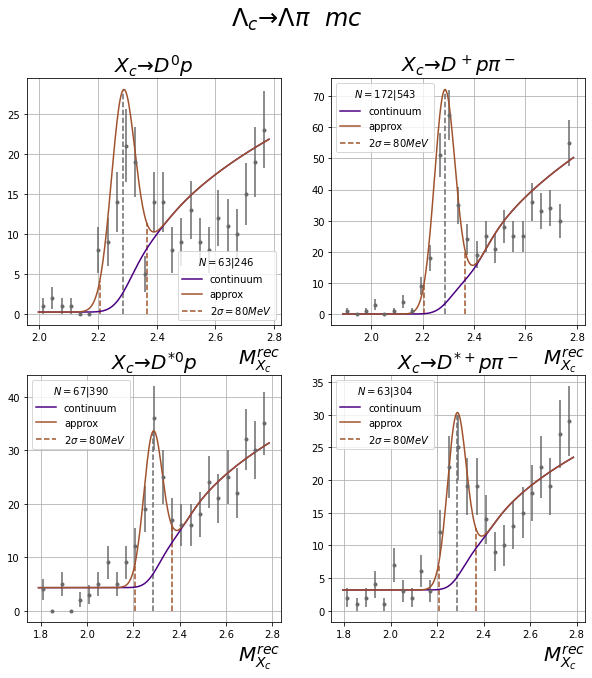

In [ ]:
n = int(np.ceil(chxc**0.5))
nbins = 25
sigmas_12 = list()
fig, axs = plt.subplots(chxc//n if chxc%n == 0 else chxc//n + 1, n, figsize=(5*n, 5*chxc//n if chxc%n == 0 else 5*(chxc//n + 1)))
j = 1
dt = data[j]

lam_cl = "\\Lambda \\pi"
label = decay_mod_tag[lam_cl][1]
with open('Mat_belle/res.json', 'r') as file:
    res = json.load(file)

for i in range(chxc):
    add_mask = Lambda_c_mass_mask(dt) & D_star_mask(dt)
    mask = (dt.chlc == 3)  & (np.abs(dt.rm2l - lamc_mass) < 0.5)
    dat = dt[(dt.chxc == i + 1) & mask]

    norm = dat.rm2l.shape[0]/nbins
    counts, bin_edges = np.histogram(dat.rm2l, bins=nbins)
    x = np.linspace(np.min(bin_edges), np.max(bin_edges), 251)
    bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
    axs[i//n, i%n].errorbar(bin_centers, counts, yerr=np.sqrt(counts), fmt ='.', color = 'dimgrey')

    args, normm = res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][:-1], res[f"fit_{label}_{decay_mod_taging[i]}_{j}"][-1]
    in_sig = 1 - np.sum(continuum_lam(x, *args[1:])*(1-args[0]))/np.sum(f_lam(x, *args))
    print(in_sig)
    tau = args[0]
    axs[i//n, i%n].plot(x, continuum_lam(x, *args[1:])*(1-tau)*norm/normm, color = 'indigo', label = "continuum")
    axs[i//n, i%n].plot(x, f_lam(x, *args)*norm/normm, color = 'sienna', label = "approx")
    s1 = args[3]
    s2 = args[4]
    tau2 = args[1]
    sigmas_12.append(sqrt(tau2*s1**2 + (1-tau2)*s2**2))

    res[f"fit_{label}_{decay_mod_taging[i]}_{j}"] = list(args)

    axs[i//n, i%n].set_title(decay_mod_taging[i], fontsize=20)
    axs[i//n, i%n].vlines((lamc_mass-2*sigmas_12[-1],lamc_mass+2*sigmas_12[-1]), (0, 0), 
                        (f_lam(lamc_mass-2*sigmas_12[-1], *args)*norm/normm, f_lam(lamc_mass+2*sigmas_12[-1], *args)*norm/normm), 
                        linestyle = '--', color = 'sienna', label = f"$2\\sigma = {round(2*sigmas_12[-1]*1000)} MeV$")
    axs[i//n, i%n].vlines((lamc_mass), (0), (f_lam(lamc_mass, *args)*norm/normm), linestyle = '--', color = 'dimgrey')
    axs[i//n, i%n].set_xlabel("$M^{rec}_{X_c}$", fontsize=20, loc='right')
    axs[i//n, i%n].legend(title = f"$N = {int(in_sig*dat.rm2l.shape[0])} | {dat.rm2l.shape[0]}$")
    axs[i//n, i%n].grid()

if j == 1:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ mc$", fontsize=24)
    rm(f"{path}fit_{label}_mc.png")
    fig.savefig(f"{path}fit_{label}_mc.png")
else:
    fig.suptitle(f"$\\Lambda_c \\to {lam_cl} \\ \\ re$", fontsize=24)
    rm(f"{path}{label}_re.png")
    fig.savefig(f"{path}fit_{label}_re.png")
plt.show()
